In [2]:
import numpy as np
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import math

from utils_data import *
import numpy as np

root_folder = './images/'
json_file = './images/gt.json'

# Load all the images and GT
def load_test():
    train_imgs, train_class_labels, train_color_labels, test_imgs, test_class_labels, \
    test_color_labels = read_dataset(root_folder=root_folder, gt_json=json_file)
    
    return test_imgs, test_class_labels,test_color_labels

def load_train():
    train_imgs, train_class_labels, train_color_labels, test_imgs, test_class_labels, \
    test_color_labels = read_dataset(root_folder=root_folder, gt_json=json_file)
    
    return test_imgs, test_class_labels,test_color_labels
    
def load_cropped():
    # Load extended ground truth
    imgs, class_labels, color_labels, upper, lower, background = read_extended_dataset()
    cropped_images = crop_images(imgs, upper, lower)
    
    return imgs, cropped_images, class_labels, color_labels
    
    
train_imgs, train_class_labels, train_color_labels, test_imgs, test_class_labels, \
    test_color_labels = read_dataset(root_folder=root_folder, gt_json=json_file)

# List with all the existent classes
classes = list(set(list(train_class_labels) + list(test_class_labels)))

# Load extended ground truth
imgs, class_labels, color_labels, upper, lower, background = read_extended_dataset()
cropped_images = crop_images(imgs, upper, lower)

(180, 80, 60, 3)
(180,)


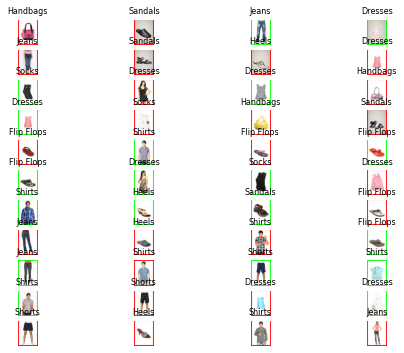

In [359]:
# Prova

# using the function visualize_retrieval for the visualization of the retrieval results. Pass the class labels as information to be displayed
predicted = np.random.choice([True, False], len(cropped_images))
print(imgs.shape)
print(cropped_images.shape)
visualize_retrieval(imgs, topN=44, info=class_labels, ok=predicted)

## 4.1: Funcions d’anàlisi qualitatiu

### Retrieval_by_color (Aleix)

In [360]:
# Code

### Retrieval_by_shape (Jan)

In [361]:
# Code

### Retrieval_combined (Aleix)

In [362]:
# Code

## Funcions d’anàlisi quantitatiu

### Kmean_statistics

Hem realitzat dues funcions per a la execució d'questa part. Procedim a explicar-les:

- plot_wcd_iter_temps_and_means(...):
    1. 

In [32]:
# Aquesta funció serveix per a fer 3 plots, de la heurística 
def plot_wcd_iter_temps_and_means(heur = None, iter=None, temps=None, Kmax=10, nom_heur='Heurística'):
    
    # Aquesta comanda serveix per a dir el nombre de columnes i files dels plots, a més de les dimensions de tot plegat
    fig, ax = plt.subplots(1, 3, figsize=(20, 20))
    
    # Avans de mostrar qualsevol dada comprovo que aquesta existeixi 
    if heur is not None:
        
        # Primer mostrem totes les dades en "linies" individuals
        
        i = 0   # i serveix per a controlar l'index i actualitzar el label de la imatge
        max_height = max(heur[0])   # max_height serveix per a trobar el valor màxim del plot, és util per a mesurar les dimensions del cada plot
        
        # itero per cada element de la mètrica en questió, el mostro i actualitzo max_height si s'escau
        for h in heur:
            # aquesta funció afegeix a la figura ax[0][0] la recta h, notem que es guarden les rectes anteriorment asignades a ax[0][0]
            ax[0].plot(range(2,2+Kmax-1), h, label=f'imatge{i}', linestyle='dotted', ) # el range(...) indica de on a on va l'eix X
            
            # Busquem si hi ha la major altura i augmentem i
            if max_height < max(h):
                max_height = max(h)
            i+=1
        
        # Acontinuació fem i mostrem la mitjana de totes les linies
        heur_array = np.array(heur)
        means = np.mean(heur_array, axis=0)
        ax[0].plot(range(2,2+Kmax-1), means, label='Average heurístic value', linewidth=2, color='black')
        
        
        # Poso titols al plot i als eixos, i mostro la llegenda
        ax[0].set_title(nom_heur + ' per K')
        ax[0].set_xlabel('K')
        ax[0].set_ylabel(nom_heur)
        
        # Mostrem la llegenda en cas de que hi hagin poques linies
        if(len(heur) <= 5):
            ax[0].legend() 
        
        # Aquí indico les dimensions del plot, per a que tingui una forma ben maca :)
        ax[0].set_aspect(aspect=Kmax/max_height)
        ax[0].figure.set_size_inches(20, 20)
        
            
    if iter is not None:

        i, max_height = 0, max(iter[0])
        for it in iter:
            ax[1].plot(range(2,2+Kmax-1), it, label=f'imatge{i}', linestyle='dotted',)
            
            if max_height < max(it):
                max_height = max(it)
            i += 1
            
        iter_array = np.array(iter)
        means = np.mean(iter_array, axis=0)  
        ax[1].plot(range(2,2+Kmax-1), means, label='Average iterations', linewidth=2, color='black') 
            
        ax[1].set_title('Number of iterations needed per K')
        ax[1].set_xlabel('K')
        ax[1].set_ylabel('# Iterations')
        
        if(len(iter) <= 5):
            ax[1].legend() 
        
        ax[1].set_aspect(aspect=Kmax/max_height)
        ax[1].figure.set_size_inches(20, 20)
        
  
    
    if temps is not None:
        i, max_height = 0, max(temps[0])
        for t in temps:
            ax[2].plot(range(2,2+Kmax-1), t, label=f'imatge{i}',linestyle='dotted')
            if max_height < max(t):
                max_height = max(t)
            i += 1
        
        time_array = np.array(temps)
        means = np.mean(time_array, axis=0)
        ax[2].plot(range(2,2+Kmax-1), means, label='Average fit time',linewidth=2, color='black')
        
        
        ax[2].set_title('Execution time of each Kmeans fit')
        ax[2].set_xlabel('K')
        ax[2].set_ylabel('Time')
        
        if(len(temps) <= 5):
            ax[2].legend() 
            
        ax[2].set_aspect(aspect=Kmax/max_height)
        ax[2].figure.set_size_inches(20, 20)

    
    
    # Ajusto l'espai que hi ha entre plots per a que es vegi bé
    plt.subplots_adjust(wspace=.7) 

    plt.show()

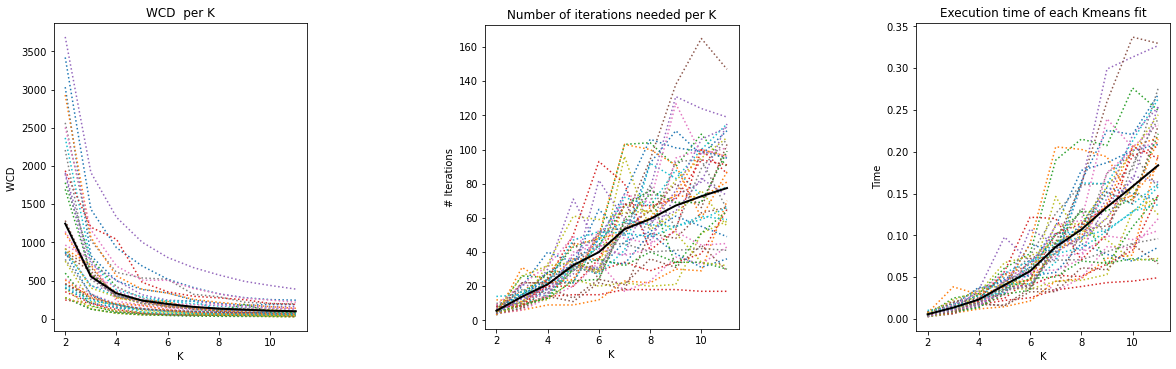

In [33]:
from Kmeans import KMeans
import time

# Aquesta funció avaluarà la funcuó fit, d'una fomrma semblant a la que implenentariem un find_best_k()
def Kmean_statistics(kmeans, imgs, kmax):
    
    wcd, iter, temps = [], [], []
    
    # Fem un model fit per a cada K diferent dins del rang [2, Kmax] i en guardem les mètriques demanades
    for i in range(2, kmax+1):
        kmeans.num_iter = 0
        kmeans.K = i
        
        # calculem el temps que es triga en fer el fit (en segons)
        start_time = time.time()
        kmeans.fit()
        end_time = time.time()
        
        
        wcd.append(kmeans.withinClassDistance())
        iter.append(kmeans.num_iter)
        temps.append(end_time - start_time)   
    
    return wcd, iter, temps




# Creem les llistes de dades i executem la funció Kmean_statistics per cada imatge 
Kmax = 11
wcd_lst, iter_lst, temps_lst = [], [], []
#for ix, input in enumerate(test_cases['input']):
for input in test_imgs[0:40]:
    
    # Inicialitzem una nova classe K-Means amb la nova imatge
    km = KMeans(input)
    
    # Calculem les estadístiques
    wcd, iter, temps = Kmean_statistics(km, None ,kmax=Kmax)
    
    wcd_lst.append(wcd)
    iter_lst.append(iter)
    temps_lst.append(temps)
    
    # Les següents 2 instuccions comentades mostren la el nuvol de punts 3D de la figura
    #km.fit()
    #visualize_k_means(km, input.shape)
    
# Mostrem el resultat 
plot_wcd_iter_temps_and_means(heur=wcd_lst, iter=iter_lst, temps=temps_lst, Kmax=Kmax, nom_heur='WCD ')

### Get_shape_accuracy (Aleix)

### Get_color_accuracy

En aquest apartat hem calculat diferents les metriques: True Positive (TP), False Positive(FP), False Negative(FN) i l'average per a un total d'N imatges , extretes del extended dataset, per a dos casos diferents, quan tenim en compte les repeticions com a false negative i quan no.

Per repeticions entenem a dos centroides que generen els mateixos colors desprès de fer un fit() (ex: [\"Blue\"], [\"Blue\"], [\"Pink\"] → es repeteix el \"Blue\" dos cops). A més donem per sentat que no existeixen repeticions de colors al Ground-Truth

Per a cada imatge del expanded kmenas següim el següent el procediment:
    
1. Realitzar el K-Means (findBestK & fit)    
2. Trobem els colors equivalents als centroides 
3. Actualitzem el nombre de Ks correctes (o no)
4. ACtualitzem el total de TP, FP, FN i el nombre de colors repetits en els resultats
5. Calculem l'accuracy
6. Mostrem els resultats

Aquesta funció (get_colors_accuracy(...)) serà més util més endavant a la hora de mirar eficiencies d'Heuristiques.

In [30]:
from Kmeans import KMeans
from Kmeans import get_colors
import copy

MAX_COLORS = 11
color_indexes = {'White': 0, 'Grey': 1, 'Black': 2, 'Orange': 3, 'Red': 4, 'Brown': 5, 'Pink': 6, 'Blue': 7, 'Green': 8, 'Purple' : 9, 'Yellow' : 10, 'None' : 11}

def get_colors_accuracy(imatges , labels, num_imatges=20, repeated_accounted=1,):
    
    # Inicialitzem les matrius i altres metriques
    trues_and_false_matrix = [0, 0, 0, 0] # Positive, False Positive, False Negative, Repeated 
    encerts_k = [0, 0] # Encert, Falla
    
    
    for image, true_colors in zip(imatges[0:num_imatges], labels[0:num_imatges]):
        
        # Inicialitzem un K-Means, trobem la millor K i predim els centroides 
        km=KMeans(image)
        km.find_bestK(max_K=MAX_COLORS)
        #km.fit()
        centroids = km.centroids

        # A partir dels centroides trobem els colors
        predicted_colors = get_colors(centroids=centroids)
        true_colors = copy.deepcopy(true_colors)
        
        #print(predicted_colors)
        #print(len(predicted_colors))
        #print(true_colors)
        #print(len(true_colors))
        
        
        # Calculem l'encert entre la K calculada i la K verdadera
        if km.K is len(true_colors):
            encerts_k[0] += 1
        else: 
            encerts_k[1] += 1
        
        
            
        # a in b → Correct
        # a not in b → False Positive
        # b not in a → False Negative
        # len a in a > 1 → Repetit
        
        # Actualitzem la matriu
        colors_done = [] # Aquesta llista ens permet recordar els colors vistos
        for predicted_color in predicted_colors:
            # REPETITS: Marquem color repetit si n'hi ha mes de 2 i no l'hem vist encara
            if predicted_color not in colors_done:
                if predicted_colors.count(predicted_color) > 1:
                    # Marquem color repetit
                    trues_and_false_matrix[3] += 1 
                    
                    # Marquem el color com a ja analitzat
                    colors_done.append(predicted_color)
                
            # TRUE:
            if predicted_color in true_colors:
                # Marquem True Positive
                trues_and_false_matrix[0] += 1
                
                # Eliminem color del Ground Truth
                true_colors.remove(predicted_color) # Donem per sentat que al Ground Truth no hi han colors repetits.

                
            # FALSE POSITIVE:
            if predicted_color not in true_colors:
                if predicted_color in colors_done:
                    trues_and_false_matrix[1] += repeated_accounted 
                else:
                    # Marquem False Positive
                    trues_and_false_matrix[1] += 1 
                
        # FALSE NEGATIVE
        trues_and_false_matrix[2] += len(true_colors)
        
                
    
    # accuracy K-Means
    accuracy =  trues_and_false_matrix[0] / (trues_and_false_matrix[0] + trues_and_false_matrix[1] + trues_and_false_matrix[2]) * 100
    
    
    # Print results
    if repeated_accounted:
        print("Resultats Kmeans (repeated acounted for):\n")
    else:
        print("Resultats Kmeans (repeated NOT acounted for):\n")
    
    print("Encerts K:", encerts_k[0])
    print("Falles K:", encerts_k[1])
    print("Percentatge d'encerts K", encerts_k[0]/(encerts_k[0]+encerts_k[1])*100, "%\n")
    
    print("__________________________")
    print("| True Positives  | ", trues_and_false_matrix[0], "|")
    print("|_________________|______|")
    print("| False Positives | ", trues_and_false_matrix[1], "|")
    print("|_________________|______|")
    print("| False Negatives | ", trues_and_false_matrix[2], "|")
    print("|_________________|______|")
    print("| Repeated        | ", trues_and_false_matrix[3], "|")
    print("|_________________|______|")
    
    print("\Accuracy = ", accuracy, "%\n\n")
    
    
    #return trues_and_false_matrix, accuracy

↓ Execució de prova de les funcions

In [31]:
test_imgs, test_imgs_cropped, test_class_labels, test_color_labels = load_cropped()

#confusion_matrix, accuracy_list, accuracy_mean = get_colors_accuracy(num_imatges=len(test_imgs))
get_colors_accuracy(imatges=test_imgs_cropped, labels=test_color_labels, num_imatges=len(test_imgs), repeated_accounted=1)
get_colors_accuracy(imatges=test_imgs_cropped, labels=test_color_labels, num_imatges=len(test_imgs), repeated_accounted=0)


Resultats Kmeans (repeated acounted for):

Encerts K: 12
Falles K: 168
Percentatge d'encerts K 6.666666666666667 %

__________________________
| True Positives  |  264 |
|_________________|______|
| False Positives |  1072 |
|_________________|______|
| False Negatives |  130 |
|_________________|______|
| Repeated        |  274 |
|_________________|______|
\Accuracy =  18.00818553888131 %


Resultats Kmeans (repeated NOT acounted for):

Encerts K: 12
Falles K: 168
Percentatge d'encerts K 6.666666666666667 %

__________________________
| True Positives  |  264 |
|_________________|______|
| False Positives |  161 |
|_________________|______|
| False Negatives |  130 |
|_________________|______|
| Repeated        |  274 |
|_________________|______|
\Accuracy =  47.56756756756757 %




## Millores als mètodes de classificació

### Inicializations de Kmeans

In [ ]:
# Code

### Diferents heurístiques per BestK

In [ ]:
# Code



### Find_BestK

In [ ]:
# Code

### Features for KNN

In [ ]:
# Code